In [11]:
import pandas as pd #If this line doesn't run, please make sure you are using Python 3.0, not 3.6
import matplotlib.pyplot as plt
import numpy as np

import scipy as scipy
import scipy.stats as stat
from scipy.stats import chisquare
from scipy import integrate

from sklearn.linear_model import LinearRegression
import ipywidgets as ipw


# Good Reference for Chi Squared test
I'm using this website as a reference for writing this code: https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95 

\begin{equation}
\chi^2=\Sigma\frac{(O-E)^2}{E} \\
\text{where O is the actual value and E is the expected value.}
\end{equation}

# Creating the damped oscillaton code
For more information please see this code here: 

https://medium.com/analytics-vidhya/understanding-oscillators-python-2813ec38781d

In [22]:
#This is how we are going to make our reference equation with which to compare our results
#to what one might get in a 'perfect' system
t = np.linspace(0,1,1000)
omega_sq = 1
y = [-.6,.4] #y[0]=x and y[1]=v

In [23]:
def harmonic(t,y):
    solution = [y[1],-omega_sq*y[0]]
    return solution
sho = integrate.solve_ivp(harmonic, [0,1000], y0 = y, t_eval = t)

Text(0.5,1,'SHO')

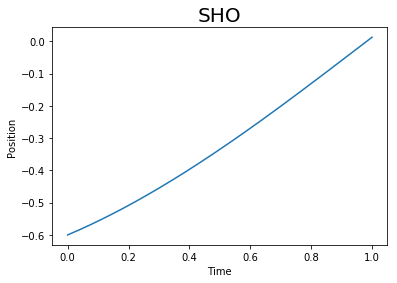

In [24]:
plt.plot(t,sho.y[0])
plt.ylabel("Position")
plt.xlabel("Time")
plt.title('SHO', fontsize = 20)

Text(0.5,1,'Damped Oscillator')

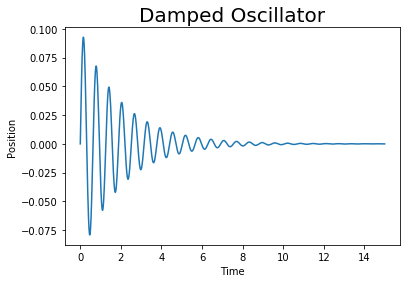

In [25]:
t = np.linspace(0,15,1474)
y = [0,1]
gamma = 1
omega_sqr = 100
def sho(t,y):
    solution = (y[1],(-gamma*y[1]-omega_sqr*y[0]))
    return solution
solution = integrate.solve_ivp(sho, [0,1000], y0 = y, t_eval = t)

plt.plot(t,solution.y[0])
plt.ylabel("Position")
plt.xlabel("Time")


plt.title('Damped Oscillator', fontsize = 20)

In [26]:
#Here is where we open our data, and print it out to see what variables we have 

data = pd.read_csv("GOOD_DATA_blackWeight6.csv")

data


,t,x,y,v,a,α,ω,t.1,t.2
0,0.000000,-0.536472,1.260832197E-1,�,�,�,�,0.000000,0.000000
1,0.125122,-0.488869,1.048960628E-1,7.231441267E-1,�,�,2.278535131E1,0.125122,0.125122
2,0.250256,-0.372637,4.921506082E-2,1.248693274E0,3.627508065E0,2.418292973E3,3.375598952E1,0.250256,0.250256
3,0.375378,-0.190444,1.219080063E-2,1.609044009E0,2.458546609E0,2.035169164E3,5.508788766E2,0.375378,0.375378
4,0.500500,0.022772,-2.682296894E-2,1.666014635E0,2.514754208E0,-6.731844228E2,7.394163554E2,0.500500,0.500500
5,0.625622,0.226412,5.423432612E-3,1.447885964E0,4.113837607E0,-2.758476661E3,2.377169112E2,0.625622,0.625622
6,0.750756,0.373382,6.463328484E-2,8.203604705E-1,5.046299206E0,-9.485133839E2,5.027786884E1,0.750756,0.750756
7,0.875878,0.407916,1.013610198E-1,1.875245983E-1,5.105737922E0,-2.102242616E2,2.140704087E1,0.875878,0.875878
8,1.001000,0.393875,1.068489935E-1,4.182099140E-1,4.517159973E0,-2.101422870E2,-1.568970452E0,1.001000,1.001000
9,1.126122,0.306894,7.402929614E-2,1.011859367E0,4.207275227E0,-2.779861362E3,-3.027972984E1,1.126122,1.126122


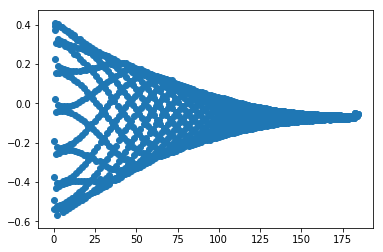

In [27]:
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

plt.scatter(X,Y)
plt.show()

In [28]:
# These two numbers should be the same size, otherwise you cannot do 
#a chi-squared fit on your data. If they are not the same go back to 
# 't = np.linspace(0,15,1474)' and change that second number 

print(len(X))
print(len(f_exp))

1474
1474


In [29]:
## This code is to change 0's in the solution (theory data) to nans
solution.y[0] = np.where(solution.y[0] == 0, 0.001, solution.y[0])

f_exp = np.transpose(solution.y[0])
chisquare(X, 0, ddof=1, axis=2)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


AxisError: axis 2 is out of bounds for array of dimension 2

In [ ]:
#plt.scatter(data.x,data.y)

In [ ]:
print(len(X))
print(len(f_exp))

In [ ]:



np.transpose(solution.y[0])


In [ ]:
plt.scatter(data.t, data.y)